# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create two new dataframes
north_df = pd.read_csv('/Users/allisoncannady/Desktop/LaunchCode/call-center-cleanup-assignment/NorthCallCenter.csv')
south_df = pd.read_csv('/Users/allisoncannady/Desktop/LaunchCode/call-center-cleanup-assignment/SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
north_df.shape

(245, 15)

#### EDA Question 1B:  How many reps are in the South branch?  

In [7]:
#Code Used: ... 11 reps
rep_south_counts = south_df['Rep ID'].value_counts()
print(rep_south_counts)

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64


In [9]:
#number of reps in north... 9 reps
rep_north_counts = north_df['Rep ID'].value_counts()
print(rep_north_counts)

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [29]:
#Code Used:
#avg_times_north = north_df[["Busy Minutes", "Incoming Wait Time", "During Call Wait Time"]].describe()

north_df.agg({"Busy Minutes" : ["average"],"Not Ready Minutes" : ["average"], "Incoming Wait Time" : ["average"],"During Call Wait Time" : ["average"]})

,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
average,9.987755,1.914286,NaN,2.967347


In [16]:
north_df["Incoming Wait Time"].sum()

250.0

In [18]:
#north_df["Incoming Wait Time"].len()
north_df.shape

(245, 15)

In [19]:
#value of average incomming wait time for north reps
250/245

1.0204081632653061

In [20]:
#confirming that the sum/length of data set is accurate
north_df["Busy Minutes"].sum()

2447

In [21]:
2447/245

9.987755102040817

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [30]:
#Code Used:
south_df.agg({"Busy Minutes" : ["average"],"Not Ready Minutes" : ["average"], "Incoming Wait Time" : ["average"],"During Call Wait Time" : ["average"]})

,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
average,10.05414,1.910828,NaN,3.076433


In [23]:
south_df.shape

(314, 15)

In [26]:
south_df["Incoming Wait Time"].sum()

378.0

In [27]:
#average incoming wait time for south branch
378/314

1.2038216560509554

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [ ]:
# Code Used:
north_df("Time Block": "9:00 AM", )

In [32]:
north_df.head(20)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [33]:
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [34]:
#confirming that each row only had one call
north_df['Calls'].value_counts()

1    245
Name: Calls, dtype: int64

In [35]:
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [36]:
south_df['Calls'].value_counts()

1    314
Name: Calls, dtype: int64

In [37]:
#calls at 12pm:
75 + 45

120

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.988
> - Not Ready Minutes = 1.194
> - Incoming Wait Time = 1.020
> - During Call Wait Time = 2.967
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054
> - Not Ready Minutes = 1.911
> - Incoming Wait Time = 1.204
> - During Call Wait Time = 3.076
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is 60-67% missing data for both branches in the "Incomming Wait Time" column. It seems as though the incomming wait time of zero is not being listed so you could replace the missing value with zero. I would do this because it might be that the computer is not recognizing calls that are answered right away and therefor having a wait time of zero, which is still a value and is important. The rest of the 33-40% of the data is important and gives information about whether the wait time is closer to zero or 5 minutes, which is important. Also, the south branch needs more help becuase their wait times are much too long.
*upon further inspection, the NaN value appears when the call is outgoing. The incoming wait times were missing 67% of data and 67% of the missing data is from outgoing calls. The missing data is not due to a computer error and can be changed to False or something similar like NA.

In [51]:
# Code Used
# Add Additional Cells as needed.


In [52]:
#Checking for missing data with % list ~ north branch
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [53]:
#Checking for missing data with % list ~ south branch
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [54]:
#Checking to see if the incoming wait times that were zero were being counted
north_df['Incoming Wait Time'].value_counts()

4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [55]:
#comparng wait times... south needs more employees due to high wait time
south_df['Incoming Wait Time'].value_counts()

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [56]:
#checking if the south location is actually busy or slacking off.... to see if their wait times were due to not answering calls as quickly
south_df['Busy Minutes'].value_counts()

9     67
12    67
10    62
11    62
8     56
Name: Busy Minutes, dtype: int64

In [57]:
#south location is more busy than not so they just need more employees.
south_df['Not Ready Minutes'].value_counts()

1    131
3    103
2     80
Name: Not Ready Minutes, dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I have worked through the entire data set and did not answer this question until now. I am not sure why i decided to change the wait times but it messed things up later when trying to do the visualizations. 

In [ ]:
#Code Used
# Add Additional Cells as needed.

In [60]:
south_df['Sale'].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [61]:
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [68]:
#checking value that is not being recognized to I can change....NaN
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [69]:
north_df['Incoming or Outgoing'].value_counts()

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [71]:
total_calls_north = 163+82
pct_outgoing_calls = 163/total_calls_north
pct_incoming_calls = 82/total_calls_north
print(pct_outgoing_calls*100, pct_incoming_calls*100)

66.53061224489795 33.46938775510204


In [ ]:
#The incoming wait times were missing 67% if data and 67% of the missing data is from outgoing calls....
#The missing data is not due to a computer error and can be changed to False or something similar. 

In [77]:
#change the NaN value to False or something similar like NA
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].replace({"NaN": "NA"})

In [79]:
#checking to see if values were changed...not working
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [80]:
#or try...
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna("NA")

In [81]:
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NA,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NA,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NA,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NA,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NA,4,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: The only thing that could be duplicated would be the index number/identifier number and those were all fine. There is nothing else to check becuase there would be duplicates for everything in a column because the same numbers, names or words are re-used. I did not drop anything but I wrote the code that would. 

In [ ]:
#Code Used
# Add Additional Cells as needed.

In [82]:
#checking column names for index/identifier number
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [85]:
#check for duplicates...False = there are no duplicates
north_df_duplicates = north_df.duplicated(subset=['Unnamed: 0']).any()
north_df_duplicates

False

In [86]:
south_df_duplicates = south_df.duplicated(subset=['Unnamed: 0']).any()
south_df_duplicates

False

In [ ]:
#drop duplicates.. or df.drop_duplicates()
#north_df_duplicate_drop = df.drop('Unnamed: 0', axis=1).drop_duplicates()

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The only unnecisssary column is "Calls" because all of them are 1 but i'm not sure we should get rid of it. Ill write the code that could be used to do so but the number of calls for that person in that time frame could be important. I also checked for duplicated data which would be unnecissary and there is none in either of the branches. 

In [ ]:
#Code Used
# Add Additional Cells as needed.

In [90]:
#checking for duplicates which would be unnecessary
north_df.shape

(245, 15)

In [91]:
south_df.shape

(314, 15)

In [92]:
#drop duplicates
key = ['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls']
north_df_drop = north_df.drop_duplicates(subset=key)

north_df_drop.shape

(245, 15)

In [93]:
key = ['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls']
south_df_drop = south_df.drop_duplicates(subset=key)

south_df_drop.shape

(314, 15)

In [ ]:
#drop columns that are unnecissary...
#north_df.drop(['Calls'], axis=1)
#south_df.drop(['Calls'], axis=1)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [94]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df], keys=["North Branch", "South Branch"])
df

Unnamed: 0 Branch     Call Purpose Time Block  \
North Branch 0             0  North        Complaint    9:00 AM   
             1             1  North    Sales Support   11:00 AM   
             2             2  North    Sales Support   11:00 AM   
             3             3  North    Sales Support    4:00 PM   
             4             4  North  Product Support   12:00 PM   
...                      ...    ...              ...        ...   
South Branch 309         309  South  Product Support    5:00 PM   
             310         310  South  Product Support    5:00 PM   
             311         311  South  Product Support    5:00 PM   
             312         312  South  Product Support    5:00 PM   
             313         313  South  Product Support    5:00 PM   

                 Incoming or Outgoing Queue  Rep ID Sale  Lost Call  \
North Branch 0               Incoming     B   Brent   NO          0   
             1               Incoming     A     Cam   NO          0   
             2               Incoming     B    Todd   NO          0   
             3               Incoming     B   Brent   NO          0   
             4               Incoming     B   Brent   NO          0   
...                               ...   ...     ...  ...        ...   
South Branch 309             Outgoing     D   Helga   NO          0   
             310             Outgoing     C   Susan   NO          0   
             311             Outgoing     C   Sandy   NO          0   
             312             Outgoing     C    Eric   NO          0   
             313             Outgoing     D  George   NO          0   

                  Abandoned  Busy Minutes  Not Ready Minutes  \
North Branch 0            1             9                  2   
             1            0            11                  1   
             2            0             9                  3   
             3            0            11                  2   
             4            0             8                  2   
...                     ...           ...                ...   
South Branch 309          0            10                  3   
             310          0            12                  3   
             311          0             9                  3   
             312          0            10                  1   
             313          0            10                  2   

                 Incoming Wait Time  During Call Wait Time  Calls  
North Branch 0                  1.0                      4      1  
             1                  1.0                      3      1  
             2                  1.0                      3      1  
             3                  1.0                      4      1  
             4                  1.0                      4      1  
...                             ...                    ...    ...  
South Branch 309                NaN                      4      1  
             310                NaN                      4      1  
             311                NaN                      4      1  
             312                NaN                      2      1  
             313                NaN                      3      1  

[559 rows x 15 columns]

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:

#my code will not work and I am unable to pull up data by branch. Not sure if it is due to errors that I made earlier while trying to change data or delete duplicates. 
- North Branch = Xander
- South Branch = 


In [ ]:
# Code Used
# Add Additional Cells as needed.

In [104]:
rep_id = df.groupby('Rep ID')
rep_id.first()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Alice,3,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,12,1,1.0,3,1
Amanda,11,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
Andy,17,North,Complaint,2:00 PM,Incoming,A,NO,0,1,9,3,2.0,4,1
Brent,0,North,Complaint,9:00 AM,Incoming,B,NO,0,1,9,2,1.0,4,1
Cam,1,North,Sales Support,11:00 AM,Incoming,A,NO,0,0,11,1,1.0,3,1
Duke,5,North,Product Support,2:00 PM,Incoming,B,NO,0,0,12,2,1.0,2,1
Eric,1,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,8,2,1.0,4,1
George,9,South,Product Support,3:00 PM,Incoming,D,NO,0,0,8,3,1.0,4,1
Helga,10,South,Product Support,3:00 PM,Incoming,D,NO,0,0,9,1,1.0,3,1


In [105]:
rep_id.describe()

Unnamed: 0                                                              \
            count        mean         std   min     25%    50%     75%    max   
Rep ID                                                                          
Alice        20.0  181.850000  102.891499   3.0  107.50  208.5  272.50  305.0   
Amanda       23.0  115.913043   61.845786  11.0   90.50  107.0  158.50  242.0   
Andy         23.0  108.434783   64.083629  17.0   50.50   99.0  167.00  231.0   
Brent        37.0  130.810811   72.047761   0.0   98.00  131.0  192.00  240.0   
Cam          24.0  114.416667   77.137323   1.0   42.00   95.5  183.25  243.0   
Duke         29.0  103.413793   77.361636   5.0   38.00   83.0  176.00  237.0   
Eric         35.0  143.971429  110.573235   1.0   41.50  113.0  274.00  312.0   
George       29.0  159.310345   94.561055   9.0   92.00  151.0  224.00  313.0   
Helga        31.0  168.903226   87.081324  10.0   87.00  196.0  238.00  309.0   
Joe          26.0  122.230769   70.576658   6.0   62.25  121.0  194.25  241.0   
Josh         26.0  152.307692   74.423528  11.0   98.50  151.5  184.25  306.0   
Karl         28.0  161.857143   83.882508   5.0   99.75  153.0  237.00  301.0   
Kate         29.0  159.137931   82.833190   0.0  105.00  174.0  222.00  288.0   
Lilly        30.0  112.500000   69.140412   7.0   45.25  112.5  164.25  232.0   
Randy        33.0  138.666667   93.361082   8.0   69.00  133.0  221.00  307.0   
Sandy        32.0  146.687500   91.916314   4.0   59.00  173.5  221.00  311.0   
Sharon       25.0  169.040000   76.928798  27.0  109.00  185.0  226.00  278.0   
Susan        26.0  154.076923   97.835749   2.0   73.25  128.0  255.50  310.0   
Todd         29.0  146.620690   70.685629   2.0   93.00  151.0  215.00  235.0   
Xander       24.0  139.166667   69.131045  27.0   78.75  139.5  205.25  244.0   

       Lost Call            ... During Call Wait Time      Calls            \
           count      mean  ...                   75%  max count mean  std   
Rep ID                      ...                                              
Alice       20.0  0.000000  ...                  3.25  4.0  20.0  1.0  0.0   
Amanda      23.0  0.000000  ...                  3.00  4.0  23.0  1.0  0.0   
Andy        23.0  0.000000  ...                  3.50  4.0  23.0  1.0  0.0   
Brent       37.0  0.000000  ...                  4.00  4.0  37.0  1.0  0.0   
Cam         24.0  0.041667  ...                  3.25  4.0  24.0  1.0  0.0   
Duke        29.0  0.068966  ...                  4.00  4.0  29.0  1.0  0.0   
Eric        35.0  0.000000  ...                  4.00  4.0  35.0  1.0  0.0   
George      29.0  0.000000  ...                  4.00  4.0  29.0  1.0  0.0   
Helga       31.0  0.000000  ...                  4.00  4.0  31.0  1.0  0.0   
Joe         26.0  0.000000  ...                  4.00  4.0  26.0  1.0  0.0   
Josh        26.0  0.115385  ...                  4.00  4.0  26.0  1.0  0.0   
Karl        28.0  0.035714  ...                  4.00  4.0  28.0  1.0  0.0   
Kate        29.0  0.000000  ...                  3.00  4.0  29.0  1.0  0.0   
Lilly       30.0  0.000000  ...                  4.00  4.0  30.0  1.0  0.0   
Randy       33.0  0.090909  ...                  4.00  4.0  33.0  1.0  0.0   
Sandy       32.0  0.031250  ...                  4.00  4.0  32.0  1.0  0.0   
Sharon      25.0  0.040000  ...                  4.00  4.0  25.0  1.0  0.0   
Susan       26.0  0.076923  ...                  4.00  4.0  26.0  1.0  0.0   
Todd        29.0  0.034483  ...                  4.00  4.0  29.0  1.0  0.0   
Xander      24.0  0.041667  ...                  4.00  4.0  24.0  1.0  0.0   

                                 
        min  25%  50%  75%  max  
Rep ID                           
Alice   1.0  1.0  1.0  1.0  1.0  
Amanda  1.0  1.0  1.0  1.0  1.0  
Andy    1.0  1.0  1.0  1.0  1.0  
Brent   1.0  1.0  1.0  1.0  1.0  
Cam     1.0  1.0  1.0  1.0  1.0  
Duke    1.0  1.0  1.0  1.0  1.0  
Eric    1.0  1.0  1.0  1.0  1.0  
George  

In [116]:
#calls_dictionary= ({"Rep ID": ['sum']}, {"Calls": ['sum', 'max']})
#calls_dictionary = {"Calls": ['sum', 'max']}
calls_dictionary = {"Rep ID": ['max', 'min']}
calls_agg=df.agg(calls_dictionary)
calls_agg

,Rep ID
max,Xander
min,Alice


In [123]:
sort_val = df.sort_values(by=["Rep ID"], ascending = False).head()


sort_val.head(10)

Unnamed: 0 Branch     Call Purpose Time Block  \
North Branch 244         244  North  Product Support    5:00 PM   
             59           59  North  Product Support    4:00 PM   
             63           63  North        Complaint   12:00 PM   
             141         141  North  Product Support   10:00 AM   
             138         138  North  Product Support   10:00 AM   

                 Incoming or Outgoing Queue  Rep ID Sale  Lost Call  \
North Branch 244             Outgoing     B  Xander   NO          0   
             59              Incoming     B  Xander   NO          0   
             63              Incoming     B  Xander   NO          0   
             141             Outgoing     B  Xander   NO          0   
             138             Outgoing     B  Xander   NO          0   

                  Abandoned  Busy Minutes  Not Ready Minutes  \
North Branch 244          0             8                  1   
             59           0            11                  3   
             63           0            10                  3   
             141          0            10                  3   
             138          0            12                  3   

                 Incoming Wait Time  During Call Wait Time  Calls  
North Branch 244                 NA                      4      1  
             59                 4.0                      4      1  
             63                 4.0                      2      1  
             141                 NA                      2      1  
             138                 NA                      2      1

In [ ]:
pivot_tb = sort_val.pivot_table("fare", ["who", "age"], "survived", aggfunc = np.sum) 

# Run your table here:
pivot_tb.head()

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 4.49%
- South Branch = 1.59% 
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? no

In [1]:
# Code Used
# Add Additional Cells as needed.

In [126]:
df.agg({'Abandoned' : ['sum', 'max']})

,Abandoned
sum,11
max,1


In [127]:
df.shape

(559, 15)

In [143]:
#percent whole company rate of abandoned calls
print(((11/559)*100), "%")

1.9677996422182469 %


In [132]:
north_df.agg({'Abandoned' : ['sum', 'max']}).sum()

Abandoned  sum    11
           max     7
dtype: int64

In [144]:
#percent north branch rate of abandoned calls
print(((11/245)*100), "%")

4.489795918367347 %


In [137]:
south_df.agg({'Abandoned' : ['sum', 'max']}).sum()

Abandoned    5
dtype: int64

In [145]:
#percent south branch rate of abandoned calls
print(((5/314)*100), "%")

1.5923566878980893 %


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
*I am going to assume this is asking for any calls that are answered in less than 2 MINUTES not 2 seconds because there are none less than 1 min. 
- North Branch = 7.84% answered in less than 2 min
- South Branch = 15.87% ""
- Company Wide = 17.79% ""

In [146]:
df.head()

Unnamed: 0 Branch     Call Purpose Time Block  \
North Branch 0           0  North        Complaint    9:00 AM   
             1           1  North    Sales Support   11:00 AM   
             2           2  North    Sales Support   11:00 AM   
             3           3  North    Sales Support    4:00 PM   
             4           4  North  Product Support   12:00 PM   

               Incoming or Outgoing Queue Rep ID Sale  Lost Call  Abandoned  \
North Branch 0             Incoming     B  Brent   NO          0          1   
             1             Incoming     A    Cam   NO          0          0   
             2             Incoming     B   Todd   NO          0          0   
             3             Incoming     B  Brent   NO          0          0   
             4             Incoming     B  Brent   NO          0          0   

                Busy Minutes  Not Ready Minutes Incoming Wait Time  \
North Branch 0             9                  2                1.0   
             1            11                  1                1.0   
             2             9                  3                1.0   
             3            11                  2                1.0   
             4             8                  2                1.0   

                During Call Wait Time  Calls  
North Branch 0                      4      1  
             1                      3      1  
             2                      3      1  
             3                      4      1  
             4                      4      1

In [ ]:
# Code Used
# Add Additional Cells as needed.

In [147]:
north_df['Incoming Wait Time'].value_counts()

Rep ID  Incoming Wait Time
Alice   1.0                    2
        3.0                    2
        2.0                    1
        5.0                    1
Amanda  NA                    18
                              ..
Todd    1.0                    2
        4.0                    1
Xander  NA                    18
        4.0                    4
        2.0                    2
Name: Incoming Wait Time, Length: 95, dtype: int64

In [151]:
north_less_than_2min = (4/51)*100
north_less_than_2min

7.8431372549019605

In [148]:
south_df['Incoming Wait Time'].value_counts()

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [152]:
south_less_than_2min = (20/126)*100
south_less_than_2min

15.873015873015872

In [149]:
df['Incoming Wait Time'].value_counts()

NA     163
4.0     50
2.0     44
3.0     41
1.0     37
5.0     36
Name: Incoming Wait Time, dtype: int64

In [153]:
company_less_than_2min = (37/208)*100
company_less_than_2min

17.78846153846154

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
#my code does not work because when I changed the incming wait times above to NA something got messed up and I cannot appy statistics to the north branch or the combined branches. 

#could not retrieve answers for north branch and whole company because the values were changed for incomming wait times to NA... and that messed it up. 

- North Branch in seconds = 
- South Branch in seconds = 3.0
- Company Wide in seconds = 


In [ ]:
#could not retrieve answers for north branch and whole company because the values were changed for incomming wait times to NA... and that messed it up. 

In [156]:
#north_df.agg({'Incoming Wait Time' : ['median']}).sum

In [157]:
south_df.agg({'Incoming Wait Time' : ['median']}).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Incoming Wait Time
median                 3.0>

In [159]:
#df.agg({'Incoming Wait Time' : ['median']}).sum

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: Single bar graph because there is only one variable per column/queue. 

In [ ]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)
    
#Your Code Here:

#aband_rate_bar = sns.abandonment_rates("Queue")
#sns.barplot(data=df, x="Queue", y="average abandonment rate")

#aband_plot = pd.DataFrame(df.loc[:,years].sum())
#df_tot.rename(columns = {0:'total'}, inplace = True)

#aband_plot = 

#plt.bar(queues, abandonment_rates, color ='maroon',
        width = 0.4)
#plt.xlabel("Queues")
#plt.ylabel("Abandonment Rate")
#plt.title("average abandonment rate per queue")
#plt.show()

In [161]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


Text(0.5, 1.0, 'average abandonment rate per queue')

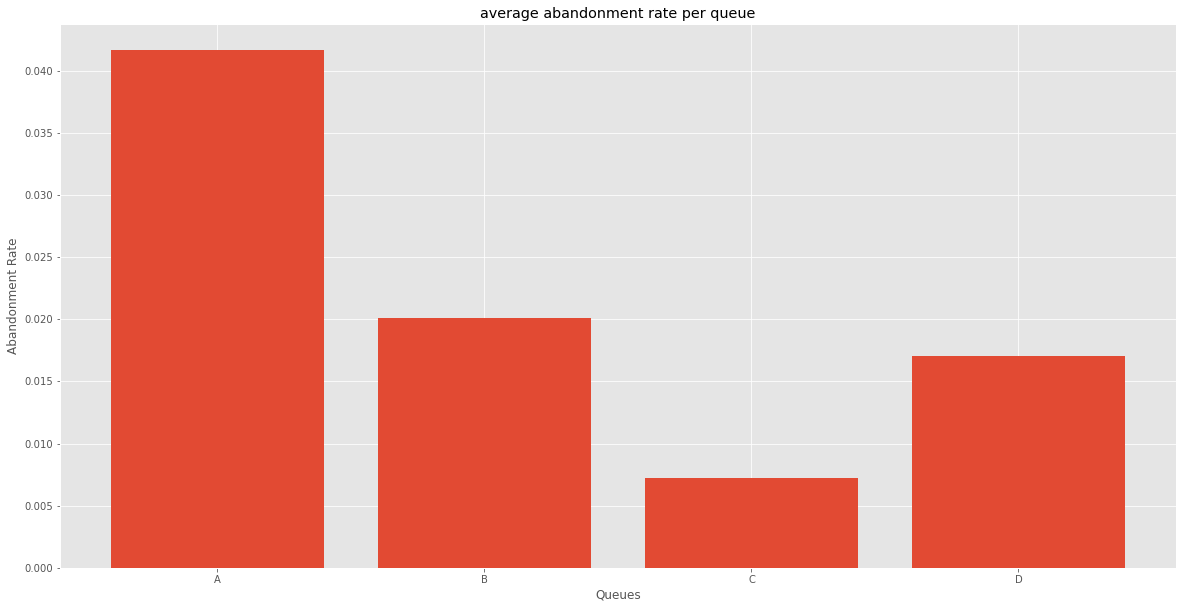

In [171]:
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.xlabel("Queues")
plt.ylabel("Abandonment Rate")
plt.title("average abandonment rate per queue")

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: two variables for each rep... grouped bar chart
It is telling me: NameError: name 'north' is not defined
The code does not work and I am not able to test graphs to see what works....

In [ ]:
#my visualizations will not work because the north branch is not showing up to the system. I must have done something previously when trying to change the calls from NaN to NA. I have tried so many things and it wont work. 

In [178]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#bar1= service_level=service level percentage , bar2= north_plt= average speed of answer

NameError: name 'north' is not defined

In [176]:
#north_plt
#service_level
#total_stats

NameError: name 'total_stats' is not defined

In [ ]:
df = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
                   ['g2','c2',10],['g2','c3',12]],columns=['group','column','val'])


df.pivot("column", "group", "val").plot(kind='bar')
plt.show()

In [ ]:
# the sample dataframe from the OP
df = pd.DataFrame([['g1', 'c1', 10], ['g1', 'c2', 12], ['g1', 'c3', 13], ['g2', 'c1', 8], ['g2', 'c2', 10], ['g2', 'c3', 12]], columns=['group', 'column', 'val'])

# plot with seaborn barplot
sns.barplot(data=df, x='column', y='val', hue='group')

In [177]:
#positive_values = [20, 17.5, 40]
#negative_values = [15, 8, 70]
index = ['Precision', 'Recall', 'f1-score', 'name']

df = pd.DataFrame({'Bar1': service_level,
                    'Bar2': north_plt}, index=index)
ax = df.plot.bar(rot=0, color={"Service Level %": "green", "Average Speed of Answer": "red"})

NameError: name 'service_level' is not defined

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: grouped bar plot because there are 2 variables per column/queue

In [ ]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need


purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


labels = ["Complaint", "Product Support", "Sales Support"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Incomming')
rects2 = ax.bar(x + width/2, women_means, width, label='Outgoing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Call Purpose')
ax.set_title('Number of Calls')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 

The most efficient company according to KPI average call absndomnet rate and KPI service level is the South Branch. THey have a lower rate of abandoned calls and a higher rate of calls answered. The south branch also has more calls answered oer day but they also have 2 more employees. When dividing the number of calls by the total number of employees the average calls per employee is very similar with 28.5 calls per employee for the south branch and 27.22 per employee for the north branch. The more efficient branch is the South Branch. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
The south branch needs more employees because their incomming wait times are higher. The south branch also has a higher amount of busy minutes and not ready minutes, meaning that they are not slacking off but have a higher incomming call rate and are not able to keep up. The south branch needs more employees and the north branch needs a new manager or better employees. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
I think it would be intersting to see how each of the teams were managed such as was the south branch more efficient because they recieved better financal incentives or were they rewarded or treated differenly than the other branch. For instance was one team getting financial bonuses or incentives. I think it would also be interesing to see what the employee retention rate was for each branch. We all know that managers have a big impact on how happy or content a person is at their job. Might the north branch have a bad manager who makes people not care about doing well?  

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: